Perform Sentiment Analysis in the network graph using RNN.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [2]:
vocab_size = 10000
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=vocab_size)

In [3]:
max_length = 200
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_length)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_length)

In [4]:
model = tf.keras.Sequential([
    layers.Embedding(vocab_size, 64, input_length=max_length),
    layers.LSTM(64),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

C:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [5]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [6]:
history = model.fit(x_train, y_train, epochs=3, batch_size=128, validation_split=0.2)

Epoch 1/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 99ms/step - accuracy: 0.6660 - loss: 0.5887 - val_accuracy: 0.8600 - val_loss: 0.3369
Epoch 2/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 110ms/step - accuracy: 0.9067 - loss: 0.2413 - val_accuracy: 0.8538 - val_loss: 0.3338
Epoch 3/3
157/157 ━━━━━━━━━━━━━━━━━━━━ 18s 117ms/step - accuracy: 0.9335 - loss: 0.1837 - val_accuracy: 0.8700 - val_loss: 0.3213


In [7]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'\nTest Accuracy: {accuracy:.4f}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.8628 - loss: 0.3439

Test Accuracy: 0.8626


In [8]:
predictions = (model.predict(x_test[:100]) > 0.5).astype(int).flatten()
true_labels = y_test[:100]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


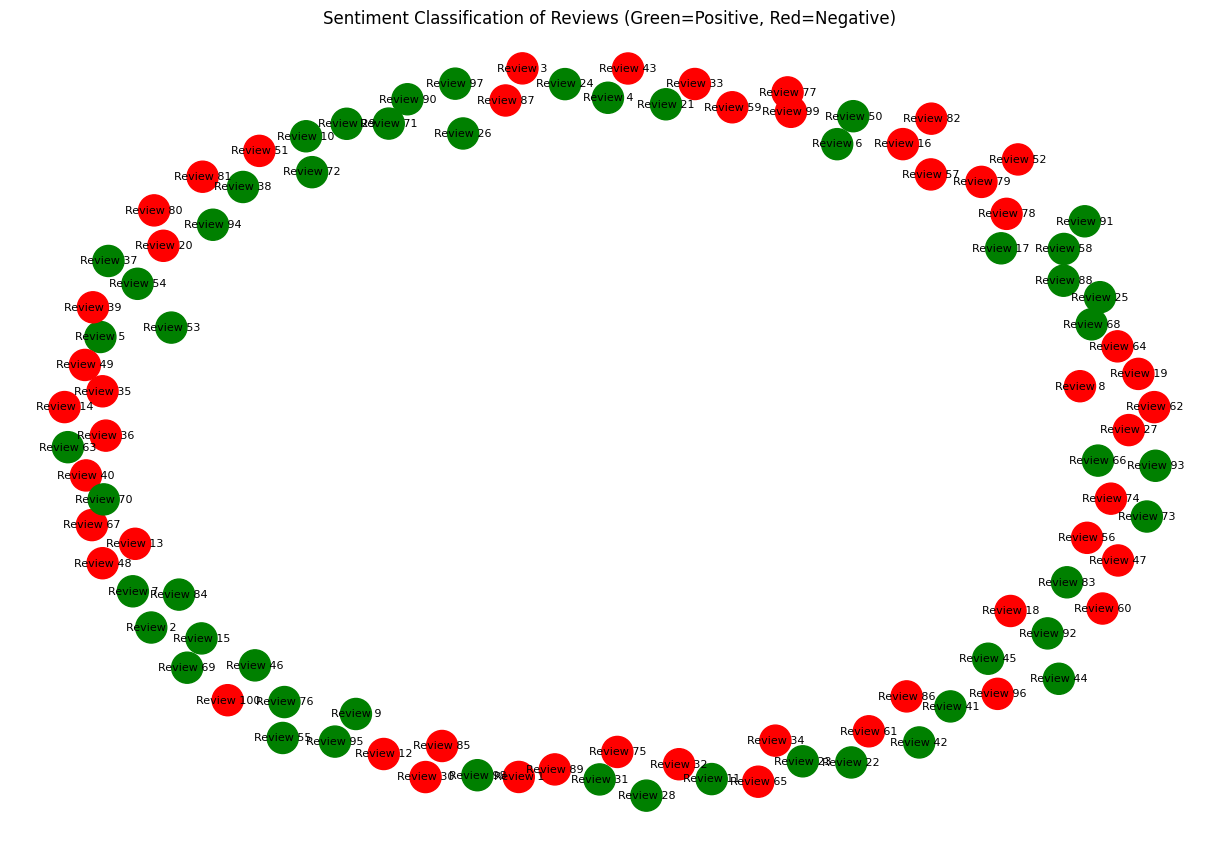

In [9]:
G = nx.Graph()

for i in range(len(predictions)):
    sentiment = "Positive" if predictions[i] == 1 else "Negative"
    color = 'green' if sentiment == "Positive" else 'red'
    G.add_node(f'Review {i+1}', sentiment=sentiment, color=color)

# Draw graph
colors = [G.nodes[node]['color'] for node in G.nodes()]
plt.figure(figsize=(12,8))
nx.draw(G, with_labels=True, node_color=colors, node_size=500, font_size=8)
plt.title('Sentiment Classification of Reviews (Green=Positive, Red=Negative)')
plt.show()